In [1]:
%pip install dtw-python
%pip install matplotlib
%pip install datetime
%pip install requests
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import requests as req

In [3]:
class Yahoo:
    def __init__(self):
        pass
    
    
    def get_chart(self,symbol:str)->list:
        headers = {
            'x-api-key': "mTd2MNVwEe3WFgj5PQ66Tbpq0CyeP8Q7ESjpmYZ2"
        }
        try:
            url = f"https://yfapi.net/v8/finance/chart/{symbol}?range=1mo&region=FR&interval=1d&lang=en"
            response = req.request("GET", url, headers=headers)
            return response.json()["chart"]["result"][0]["indicators"]["quote"][0]['close']
        
        except Exception as error:
            return error

In [24]:
## Finding two different dataset

# Getting Apple chart
reference = Yahoo().get_chart("AAPL")
print (reference)

# Getting Microsoft chart
comparison = Yahoo().get_chart("MSFT")
print (comparison)

[167.3000030517578, 164.32000732421875, 160.07000732421875, 162.74000549316406, 164.85000610351562, 165.1199951171875, 163.1999969482422, 166.55999755859375, 166.22999572753906, 163.1699981689453, 159.3000030517578, 157.44000244140625, 162.9499969482422, 158.52000427246094, 154.72999572753906, 150.6199951171875, 155.08999633789062, 159.58999633789062, 160.6199951171875, 161.19000244140625]
[287.92999267578125, 287.7200012207031, 280.2699890136719, 294.5899963378906, 297.30999755859375, 298.7900085449219, 294.95001220703125, 300.19000244140625, 295.9200134277344, 289.8599853515625, 278.9100036621094, 275.8500061035156, 288.5, 285.5899963378906, 280.07000732421875, 276.44000244140625, 287.1499938964844, 294.3900146484375, 295.2200012207031, 296.4599914550781]


In [71]:
distances = []
for i in range (0,len(reference)):
    distance = abs(reference[i]-comparison[i])
    distances.append(distance)
    
print(distances)

[120.62998962402344, 123.39999389648438, 120.19998168945312, 131.84999084472656, 132.45999145507812, 133.67001342773438, 131.75001525878906, 133.6300048828125, 129.6900177001953, 126.68998718261719, 119.61000061035156, 118.41000366210938, 125.55000305175781, 127.06999206542969, 125.34001159667969, 125.82000732421875, 132.05999755859375, 134.80001831054688, 134.60000610351562, 135.26998901367188]


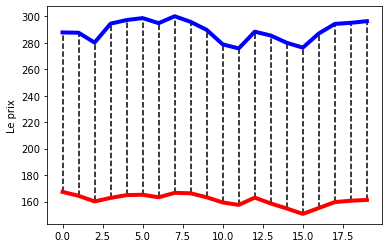

In [72]:
from pylab import *
for i in range (0,len(reference)):
    x = [i,i]
    y = [reference[i],comparison[i]]
    plot(x, y,"k--")
x = np.linspace(0, len(reference)-1, len(reference))
plot(x, reference, "r", linewidth=4)
plot(x, comparison,"b",linewidth=4)
ylabel("Le prix")

plt.show()

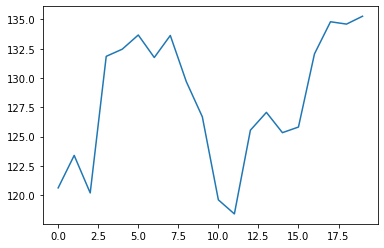

In [73]:
x = np.linspace(0, len(reference)-1, len(reference))
plot(x,distances)
plt.show()

128.12500076293946


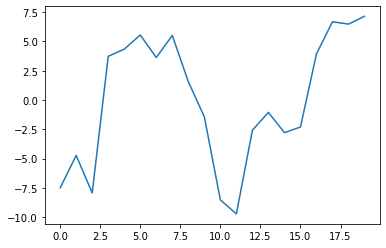

In [81]:
import statistics

moyenne = statistics.mean(distances)
print(moyenne)
variationsDistance = []
for i in range (0,len(reference)):
    valeur = distances[i] - moyenne
    variationsDistance.append(valeur)
    
plot(x,variationsDistance)
plt.show()

In [85]:
resultat = abs(statistics.mean(variationsDistance))
print(resultat)

1.1368683772161604e-14
